In [2]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.preprocessing import scale, MinMaxScaler, normalize, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
df2 = pd.read_pickle('my_df.pickle')

In [4]:
df2.columns

Index([             u'name',         u'n_reviews',           u'st_addr',
                    u'city',             u'state',            u'zip_cd',
            u'excellent_ct',       u'verygood_ct',        u'average_ct',
                 u'poor_ct',       u'terrible_ct',          u'families',
                 u'couples',              u'solo',          u'business',
                 u'friends',            u'spring',            u'summer',
                    u'fall',            u'winter',       u'description',
                u'rank_num',         u'rooms_num',        u'prange_low',
             u'prange_high',      u'prange_range',        u'hclass_num',
                   u'zip_5',         u'full_addr',         u'longitude',
                u'latitude',        u'rank_group',         u'amen_wifi',
       u'amen_room_service',   u'amen_restaurant',   u'amen_bar_lounge',
                u'amen_gym',          u'amen_spa',    u'amen_breakfast',
               u'amen_pool',     u'amen_internet', 

In [5]:
df2.shape

(446, 42)

In [50]:
ranks_list = df2.rank_num.unique().tolist()
ranks_list.sort()
ranks_list

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [51]:
df2.rank_num.unique().size

446

In [52]:
#Ranks missing: 432, 421, 392 (shift values so there are no gaps)
def shift_values(orig_val):
    if orig_val <= 391:
        new_val = orig_val
    elif (orig_val > 391) & (orig_val <= 420):
        new_val = orig_val - 1
    elif (orig_val > 421) & (orig_val <= 431):
        new_val = orig_val - 2
    elif orig_val > 432:
        new_val = orig_val - 3
    return new_val

In [53]:
df2['rank_num'] = df2.rank_num.apply(lambda x: shift_values(x))

In [55]:
ranks_list_mdfd = df2.rank_num.unique().tolist()
ranks_list_mdfd.sort()
ranks_list_mdfd

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [56]:
df2['top30'] = df2.rank_num.apply(lambda x: 1 if x <= 30 else 0)

In [57]:
df2.top30.value_counts()

0    416
1     30
Name: top30, dtype: int64

In [58]:
df2['n_english_reviews'] = df2.spring + df2.summer + df2.fall + df2.winter

In [59]:
df2['pct_english_reviews'] = df2.n_english_reviews / df2.n_reviews

In [60]:
count_cols = {'rating_cts': ['excellent_ct','verygood_ct','average_ct','poor_ct','terrible_ct'],
             'travel_type_cts': ['families','couples','solo','business','friends'],
             'season_cts': ['spring','summer','fall','winter']}

In [61]:
count_cols.items()

[('rating_cts',
  ['excellent_ct', 'verygood_ct', 'average_ct', 'poor_ct', 'terrible_ct']),
 ('travel_type_cts', ['families', 'couples', 'solo', 'business', 'friends']),
 ('season_cts', ['spring', 'summer', 'fall', 'winter'])]

In [62]:
for item in count_cols.items():
    for count_col in item[1]:
        print count_col

excellent_ct
verygood_ct
average_ct
poor_ct
terrible_ct
families
couples
solo
business
friends
spring
summer
fall
winter


In [63]:
for item in count_cols.items():
    #dynamic string to be used for naming column with total of category counts
    item_ct = item[0].split('_')[0] + '_ct'
    df2[item_ct] = 0.
    #dynamic string to be used for naming column with total of category percentages
    item_pct = item[0].split('_')[0] + '_pct'
    df2[item_pct] = 0.
    for cc in item[1]:
        cc_pct = cc.split('_')[0] + '_pct'
        df2[cc_pct] = df2[cc] / df2.n_english_reviews
        #df2[item_ct] += df2[cc]
        #df2[item_pct] += df2[cc_pct]

df2['travel_type_pct_unk'] = 1. - (df2.families_pct + df2.couples_pct + df2.solo_pct + df2.business_pct + df2.friends_pct)

In [64]:
df2.columns

Index([               u'name',           u'n_reviews',             u'st_addr',
                      u'city',               u'state',              u'zip_cd',
              u'excellent_ct',         u'verygood_ct',          u'average_ct',
                   u'poor_ct',         u'terrible_ct',            u'families',
                   u'couples',                u'solo',            u'business',
                   u'friends',              u'spring',              u'summer',
                      u'fall',              u'winter',         u'description',
                  u'rank_num',           u'rooms_num',          u'prange_low',
               u'prange_high',        u'prange_range',          u'hclass_num',
                     u'zip_5',           u'full_addr',           u'amen_wifi',
         u'amen_room_service',     u'amen_restaurant',     u'amen_bar_lounge',
                  u'amen_gym',            u'amen_spa',      u'amen_breakfast',
                 u'amen_pool',       u'amen_internet

In [65]:
df2[['name','n_reviews','n_english_reviews','pct_english_reviews']].head()

,name,n_reviews,n_english_reviews,pct_english_reviews
0,Loews Regency New York Hotel,1355,1220.0,0.900369
1,The Towers of the Waldorf Astoria - TEMPORARIL...,2016,1830.0,0.907738
2,Langham Place New York Fifth Avenue,2065,1743.0,0.844068
3,The Mark,687,589.0,0.857351
4,The St. Regis New York,633,573.0,0.905213


In [66]:
df2[['excellent_pct','verygood_pct','average_pct','poor_pct','terrible_pct']].head()

,excellent_pct,verygood_pct,average_pct,poor_pct,terrible_pct
0,0.780328,0.132787,0.050820,0.022131,0.013934
1,0.754645,0.133880,0.058470,0.037705,0.015301
2,0.812966,0.116466,0.041308,0.018933,0.010327
3,0.787776,0.147708,0.040747,0.013582,0.010187
4,0.781850,0.122164,0.059337,0.020942,0.015707


In [67]:
#CODE TO CHECK IF PERCENT VALUES ADD UP TO 1.0 ACROSS CATEGORIES
#df2.apply(lambda x: x['season_ct'] == x['rating_ct'], axis=1).value_counts()
#df.loc[(df.a == 0) & (df.b == 0) & (df.c == 0), list('def')] = 0
#df2.loc[~(round(df2.excellent_pct + df2.verygood_pct + df2.average_pct + df2.poor_pct + df2.terrible_pct, decimals=1) == 1.0),['excellent_pct','verygood_pct','average_pct','poor_pct','terrible_pct']]
#df2.apply(lambda x: x['excellent_pct'] + x['verygood_pct'] + x['average_pct'] + x['poor_pct'] + x['terrible_pct'] == 1.0)

In [68]:
df2[['spring_pct','summer_pct','fall_pct','winter_pct']].head()

,spring_pct,summer_pct,fall_pct,winter_pct
0,0.258197,0.283607,0.223770,0.234426
1,0.229508,0.288525,0.208743,0.273224
2,0.247849,0.259897,0.238095,0.254159
3,0.193548,0.305603,0.264856,0.235993
4,0.216405,0.244328,0.246073,0.293194


In [69]:
df2[['travel_type_pct_unk','families_pct','couples_pct','solo_pct','business_pct','friends_pct']].head()

,travel_type_pct_unk,families_pct,couples_pct,solo_pct,business_pct,friends_pct
0,0.049180,0.315574,0.303279,0.036066,0.211475,0.084426
1,0.049180,0.345902,0.355191,0.036066,0.133333,0.080328
2,0.065404,0.256454,0.370052,0.037866,0.206540,0.063683
3,0.071307,0.195246,0.398981,0.089983,0.191851,0.052632
4,0.064572,0.225131,0.431065,0.045375,0.178010,0.055846


In [70]:
df2_miss = df2.isnull().sum().sort_values(ascending=False)
df2_miss[df2_miss > 0]

hclass_num      28
prange_range    22
prange_high     22
prange_low      22
rooms_num        6
dtype: int64

In [71]:
df2.loc[df2['rooms_num'].isnull()]

,name,n_reviews,st_addr,city,state,zip_cd,excellent_ct,verygood_ct,average_ct,poor_ct,...,solo_pct,business_pct,friends_pct,season_ct,season_pct,spring_pct,summer_pct,fall_pct,winter_pct,travel_type_pct_unk
99,National at Park Towers,2,315 West 57th Street,New York City,NY,10019-3158,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.500000,0.000000,0.000000
100,Third Ave House,4,215 E 81st St,New York City,NY,10028-2625,1.0,0.0,0.0,1.0,...,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.333333,0.333333,0.333333,-0.333333
307,Hilton Garden Inn New York/Midtown Park Ave,926,45 E 33rd St,New York City,NY,10016-5336,409.0,234.0,53.0,28.0,...,0.074124,0.230458,0.106469,0.0,0.0,0.222372,0.195418,0.258760,0.323450,0.033693
315,Hilton Garden Inn New York/Manhattan-Midtown East,1128,206 E 52nd St,New York City,NY,10022-6201,514.0,289.0,92.0,34.0,...,0.080713,0.230608,0.081761,0.0,0.0,0.208595,0.273585,0.268344,0.249476,0.054507
355,Executive Hotel LeSoleil,616,38 W 36th St,New York City,NY,10018-8078,313.0,129.0,39.0,11.0,...,0.070140,0.166333,0.078156,0.0,0.0,0.238477,0.142285,0.308617,0.310621,0.062124
380,Hotel Indigo Lower East Side New York,500,171 Ludlow Street,New York City,NY,10002-1501,293.0,99.0,24.0,10.0,...,0.097222,0.173611,0.129630,0.0,0.0,0.300926,0.189815,0.219907,0.289352,0.048611


In [72]:
from fancyimpute import KNN

In [73]:
cols_for_impute = ['n_reviews','rank_num','rooms_num','prange_low','prange_high',
                    'prange_range','hclass_num','amen_wifi','amen_room_service','amen_restaurant',
                    'amen_bar_lounge','amen_gym','amen_spa','amen_breakfast','amen_pool','amen_internet',
                    'amen_parking','n_english_reviews']
df2_for_impute = df2[cols_for_impute]
array_filled_knn = KNN(k=5).complete(df2_for_impute)

Imputing row 1/446 with 0 missing, elapsed time: 0.053
Imputing row 101/446 with 5 missing, elapsed time: 0.057
Imputing row 201/446 with 0 missing, elapsed time: 0.058
Imputing row 301/446 with 0 missing, elapsed time: 0.058
Imputing row 401/446 with 0 missing, elapsed time: 0.059


In [74]:
df2_filled_knn = pd.DataFrame(array_filled_knn, columns=cols_for_impute)

In [75]:
df2_filled_knn.shape

(446, 18)

In [76]:
df2_filled_knn.isnull().sum()

n_reviews            0
rank_num             0
rooms_num            0
prange_low           0
prange_high          0
prange_range         0
hclass_num           0
amen_wifi            0
amen_room_service    0
amen_restaurant      0
amen_bar_lounge      0
amen_gym             0
amen_spa             0
amen_breakfast       0
amen_pool            0
amen_internet        0
amen_parking         0
n_english_reviews    0
dtype: int64

In [77]:
df2.drop(cols_for_impute, axis=1, inplace=True)

In [78]:
df2.columns

Index([               u'name',             u'st_addr',                u'city',
                     u'state',              u'zip_cd',        u'excellent_ct',
               u'verygood_ct',          u'average_ct',             u'poor_ct',
               u'terrible_ct',            u'families',             u'couples',
                      u'solo',            u'business',             u'friends',
                    u'spring',              u'summer',                u'fall',
                    u'winter',         u'description',               u'zip_5',
                 u'full_addr',               u'top30', u'pct_english_reviews',
                 u'rating_ct',          u'rating_pct',       u'excellent_pct',
              u'verygood_pct',         u'average_pct',            u'poor_pct',
              u'terrible_pct',           u'travel_ct',          u'travel_pct',
              u'families_pct',         u'couples_pct',            u'solo_pct',
              u'business_pct',         u'friends_pct

In [79]:
df2_filledin = pd.concat([df2,df2_filled_knn],axis=1)

In [80]:
print df2.shape, df2_filled_knn.shape, df2_filledin.shape

(446, 45) (446, 18) (446, 63)


In [81]:
df2_filledin.hclass_num.unique()

array([ 3.5       ,  5.        ,  4.5       ,  4.        ,  3.        ,
        2.        ,  3.1614507 ,  2.5       ,  3.24511982,  3.62087949,
        2.55732466,  3.06886431,  1.5       ,  2.51467582,  3.90299289,
        3.23112809,  1.        ,  2.7511178 ,  2.58378577,  2.81227851,
        3.71388554,  3.56211855,  3.23007926,  3.35065197,  3.86311923,
        2.97473412,  3.47705073,  3.46393902,  3.4477837 ,  3.79253053,
        3.79736988,  3.30536893,  2.95172379,  2.92417048,  3.148012  ,
        2.72941823,  2.93045089])

In [82]:
df2_filledin['hclass_num'] = df2_filledin.hclass_num.apply(lambda x: round(x * 2) / 2)

In [83]:
df2_filledin.hclass_num.unique()

array([ 3.5,  5. ,  4.5,  4. ,  3. ,  2. ,  2.5,  1.5,  1. ])

In [84]:
#convert hotel class values to dummies
df2_filledin = pd.get_dummies(df2_filledin, columns=['hclass_num'])

In [85]:
#convert zip5 values to dummies
df2_filledin = pd.get_dummies(df2_filledin, columns=['zip_5'])

In [86]:
df2 = df2_filledin

In [87]:
df2.columns

Index([        u'name',      u'st_addr',         u'city',        u'state',
             u'zip_cd', u'excellent_ct',  u'verygood_ct',   u'average_ct',
            u'poor_ct',  u'terrible_ct',
       ...
        u'zip_5_10027',  u'zip_5_10028',  u'zip_5_10032',  u'zip_5_10033',
        u'zip_5_10036',  u'zip_5_10038',  u'zip_5_10065',  u'zip_5_10078',
        u'zip_5_10128',  u'zip_5_10282'],
      dtype='object', length=101)

In [144]:
# df2.hclass_num.head()
df2.

KeyError: 'hclass_num'

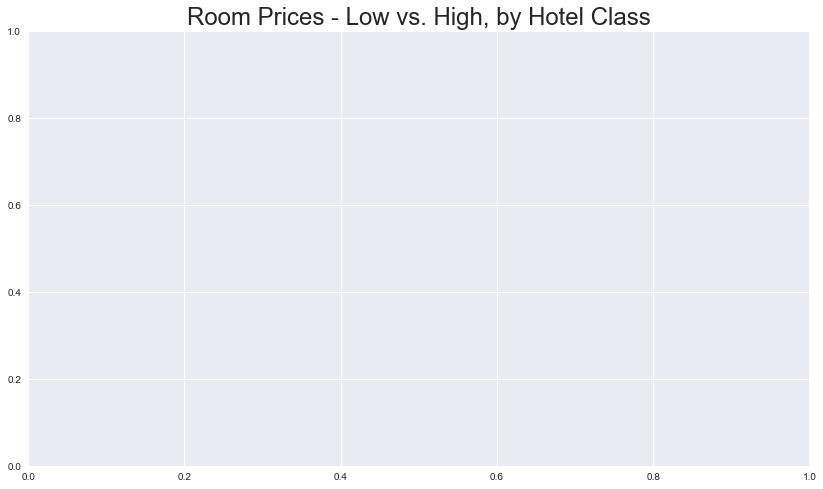

In [141]:
colors = {1.0:'red', 1.5:'blue', 2.0:'green', 2.5:'black', 3.0:'orange', 3.5:'brown', 4.0:'yellow', 4.5:'sandybrown', 5.0:'c'}

#ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

plt.figure(figsize=(14,8))
plt.title('Room Prices - Low vs. High, by Hotel Class', fontsize=24)
plt.scatter(df2.prange_low,df2.prange_high,c=df2['hclass_num'].apply(lambda x: colors[x]))
plt.xlabel('Low End of Price Range', fontsize=20)
plt.ylabel('High End of Price Range', fontsize=20)
plt.ylim(-500,4000)
plt.show()

In [142]:
class_cols = [col for col in list(df2) if col.startswith('hclass_num_')]
class_cols

['hclass_num_1.0',
 'hclass_num_1.5',
 'hclass_num_2.0',
 'hclass_num_2.5',
 'hclass_num_3.0',
 'hclass_num_3.5',
 'hclass_num_4.0',
 'hclass_num_4.5',
 'hclass_num_5.0']

In [91]:
zip_cols = [col for col in list(df2) if col.startswith('zip_5')]
zip_cols

[u'zip_5_10001',
 u'zip_5_10002',
 u'zip_5_10003',
 u'zip_5_10004',
 u'zip_5_10005',
 u'zip_5_10006',
 u'zip_5_10007',
 u'zip_5_10010',
 u'zip_5_10011',
 u'zip_5_10012',
 u'zip_5_10013',
 u'zip_5_10014',
 u'zip_5_10016',
 u'zip_5_10017',
 u'zip_5_10018',
 u'zip_5_10019',
 u'zip_5_10021',
 u'zip_5_10022',
 u'zip_5_10023',
 u'zip_5_10024',
 u'zip_5_10025',
 u'zip_5_10027',
 u'zip_5_10028',
 u'zip_5_10032',
 u'zip_5_10033',
 u'zip_5_10036',
 u'zip_5_10038',
 u'zip_5_10065',
 u'zip_5_10078',
 u'zip_5_10128',
 u'zip_5_10282']

In [93]:
len(zip_cols)

31

In [ ]:
#Identify predictor columns (omitting rooms_num, prange_low, prange_how for now)
# X_cols = ['n_reviews','rooms_num','excellent_pct','verygood_pct','average_pct','poor_pct','terrible_pct',
#          'spring_pct','summer_pct','fall_pct','winter_pct',
#          'travel_type_pct_unk','families_pct','couples_pct','solo_pct','business_pct','friends_pct',
#          'amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge','amen_gym',
#          'amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking'] + zip_cols + class_cols

In [94]:
#Identify predictor columns
X_cols = ['rooms_num','prange_low','prange_high',
         'amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge','amen_gym',
         'amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking'] + zip_cols + class_cols

In [95]:
X = df2[X_cols]

In [96]:
X.shape

(446, 53)

In [97]:
#Identify target column
y = df2.top30

In [98]:
y.shape

(446,)

In [99]:
y.value_counts()

0    416
1     30
Name: top30, dtype: int64

In [145]:
X.columns

Index([        u'rooms_num',        u'prange_low',       u'prange_high',
               u'amen_wifi', u'amen_room_service',   u'amen_restaurant',
         u'amen_bar_lounge',          u'amen_gym',          u'amen_spa',
          u'amen_breakfast',         u'amen_pool',     u'amen_internet',
            u'amen_parking',       u'zip_5_10001',       u'zip_5_10002',
             u'zip_5_10003',       u'zip_5_10004',       u'zip_5_10005',
             u'zip_5_10006',       u'zip_5_10007',       u'zip_5_10010',
             u'zip_5_10011',       u'zip_5_10012',       u'zip_5_10013',
             u'zip_5_10014',       u'zip_5_10016',       u'zip_5_10017',
             u'zip_5_10018',       u'zip_5_10019',       u'zip_5_10021',
             u'zip_5_10022',       u'zip_5_10023',       u'zip_5_10024',
             u'zip_5_10025',       u'zip_5_10027',       u'zip_5_10028',
             u'zip_5_10032',       u'zip_5_10033',       u'zip_5_10036',
             u'zip_5_10038',       u'zip_5_10065', 

In [146]:
X['hclass_num_2.0'].value_counts()

0    430
1     16
Name: hclass_num_2.0, dtype: int64

In [ ]:
colors = {1.0:'red', 1.5:'blue', 2.0:'green', 2.5:'black', 3.0:'orange', 3.5:'brown', 4.0:'yellow', 4.5:'sandybrown', 5.0:'c'}

#ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

plt.figure(figsize=(14,8))
plt.title('Room Prices - Low vs. High, by Hotel Class', fontsize=24)
plt.scatter(X.prange_low,X.prange_high,c=X['hclass_num'].apply(lambda x: colors[x]))
plt.xlabel('Low End of Price Range', fontsize=20)
plt.ylabel('High End of Price Range', fontsize=20)
plt.ylim(-500,4000)
plt.show()

#### EDA / STATS 

In [100]:
df_target = df2[['top30']]

In [101]:
df_target.shape

(446, 1)

In [102]:
df_for_stats = pd.concat([X,df_target],axis=1)

In [103]:
df_for_stats.shape

(446, 54)

In [104]:
pct_cols = [col for col in list(df2) if col.endswith('_pct')]

In [105]:
pct_cols

['rating_pct',
 'excellent_pct',
 'verygood_pct',
 'average_pct',
 'poor_pct',
 'terrible_pct',
 'travel_pct',
 'families_pct',
 'couples_pct',
 'solo_pct',
 'business_pct',
 'friends_pct',
 'season_pct',
 'spring_pct',
 'summer_pct',
 'fall_pct',
 'winter_pct']

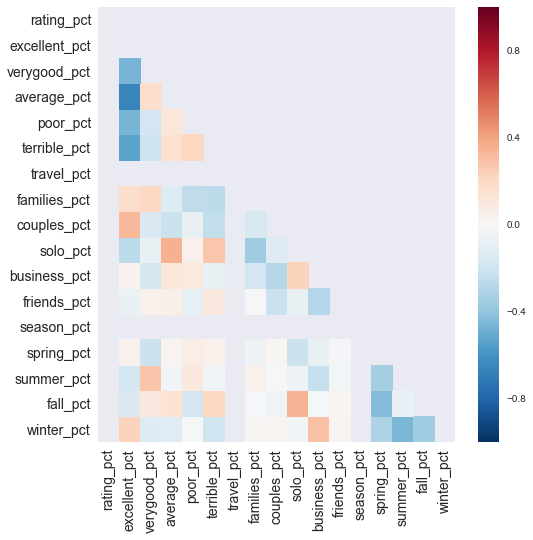

In [106]:
corrs = df2[pct_cols].corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [107]:
df2.drop(['rating_pct','season_pct','travel_pct'],axis=1,inplace=True)

In [108]:
#sns.pairplot(data = df_for_stats, vars=pct_cols, hue="top30");

In [109]:
df2.to_pickle('df_446.pickle')

#### MODELING

In [110]:
#Identify columns that needs to be scaled
X_cols_for_scaling = ['rooms_num','prange_low','prange_high']

In [111]:
X_for_scaling = df2[X_cols_for_scaling]

In [112]:
X_for_scaling.shape

(446, 3)

In [114]:
mm = MinMaxScaler()
Xn = mm.fit_transform(X_for_scaling)

In [147]:
# standardize X
#ss = StandardScaler()
#Xn = ss.fit_transform(X)

In [116]:
Xn_df = pd.DataFrame(Xn, columns=X_cols_for_scaling)

In [118]:
Xn_df.head()

,rooms_num,prange_low,prange_high
0,0.192012,0.395808,0.069255
1,0.088582,0.815043,1.000000
2,0.107527,0.508015,0.085633
3,0.075781,0.548705,0.092812
4,0.115207,0.868064,0.127490


In [119]:
#Identify remaining predictor columns (all binary)
X_cols_remaining = ['amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge','amen_gym',
         'amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking'] + zip_cols + class_cols

In [120]:
X_remaining = df2[X_cols_remaining]

In [121]:
X_remaining.shape

(446, 50)

In [122]:
Xn_df = pd.concat([Xn_df,X_remaining],axis=1)

In [123]:
Xn_df.shape

(446, 53)

In [124]:
X_train, X_test, Y_train, Y_test =  train_test_split(Xn_df, y, test_size = 0.5, random_state=1234)

In [125]:
print type(X_train)

<class 'pandas.core.frame.DataFrame'>


In [126]:
X_test.head()

,rooms_num,prange_low,prange_high,amen_wifi,amen_room_service,amen_restaurant,amen_bar_lounge,amen_gym,amen_spa,amen_breakfast,...,zip_5_10282,hclass_num_1.0,hclass_num_1.5,hclass_num_2.0,hclass_num_2.5,hclass_num_3.0,hclass_num_3.5,hclass_num_4.0,hclass_num_4.5,hclass_num_5.0
369,0.126984,0.152898,0.027196,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
29,0.270865,0.230580,0.036902,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
169,0.118792,0.171393,0.032858,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
131,0.023554,0.166461,0.027904,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
391,0.082949,0.401973,0.057527,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


#### LOGISTIC REGRESSION

In [127]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
#compute accuracy on training data
#provides percentage of training data points that were classified correctly
print "Training set accuracy: ", logreg.score(X_train, Y_train)

Training set accuracy:  0.955156950673


In [129]:
#provides percentage of training data points that are actuallly in the predicted class
print "Baseline: ", 1. - Y_train.mean()

Baseline:  0.941704035874


In [130]:
#compute accuracy on test data
print "Test set accuracy: ", logreg.score(X_test, Y_test)

Test set accuracy:  0.923766816143


In [131]:
#output confusion matrix on test data
Y_pred = logreg.predict(X_test)

In [132]:
#test data confusion matrix
confusion_matrix(Y_test, Y_pred)

array([[206,   0],
       [ 17,   0]])

In [133]:
#output confusion matrix on train data
Y_pred_train = logreg.predict(X_train)

In [134]:
confusion_matrix(Y_train, Y_pred_train)

array([[210,   0],
       [ 10,   3]])

In [135]:
accuracy = cross_val_score(logreg, X_train, Y_train, cv=5, n_jobs=1)

In [136]:
print accuracy
print np.mean(accuracy)

[ 0.93333333  0.93333333  0.93333333  0.95454545  0.95454545]
0.941818181818


In [137]:
#Logistic Regression with Grid Search
lr_params = {
    'solver':['liblinear'],
    #'C':np.logspace(-4, -1, 150),
    'C':np.linspace(0.0001, 1000, 500),
    'penalty':['l1','l2']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   53.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   2.00411e+00, ...,   9.97996e+02,   1.00000e+03]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [138]:
# best parameters
lr_gs.best_params_

{'C': 18.036170340681362, 'penalty': 'l1', 'solver': 'liblinear'}

In [139]:
# best score in gridsearch as well as baseline score:
print lr_gs.best_score_
print 1. - np.mean(Y_train)

0.968609865471
0.941704035874


In [166]:
#test data accuracy score
print "Test set accuracy: ", lr_gs.score(X_test, Y_test)

Test set accuracy:  0.90134529148


In [167]:
lr_predictions = lr_gs.predict(X_test)

In [168]:
#test data confusion matrix
confusion_matrix(Y_test, lr_predictions)

array([[201,   5],
       [ 17,   0]])

In [169]:
conmat = np.array(confusion_matrix(Y_test, lr_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    0                   17
in_bottom_group                 5                  201


In [224]:
lr_preds_series = pd.Series(data=lr_predictions).rename("Pred_Val")

In [229]:
Y_test_w_preds = pd.concat([Y_test.reset_index(),lr_preds_series],axis=1).set_index('index')

In [230]:
Y_test_w_preds.head()

,top30,Pred_Val
index,,
369,0,0
29,0,0
169,0,0
131,0,0
391,0,0


In [231]:
pd.crosstab(Y_test_w_preds.top30, Y_test_w_preds.Pred_Val)

Pred_Val,0,1
top30,,
0,201,5
1,17,0


In [239]:
lr_fns = Y_test_w_preds.merge(df2.drop('top30',axis=1),how='inner',left_index=True,right_index=True)

In [240]:
lr_fns.shape

(223, 98)

In [245]:
lr_fns[(lr_fns.top30 == 1) & (lr_fns.Pred_Val == 0)]

,top30,Pred_Val,name,st_addr,city,state,zip_cd,excellent_ct,verygood_ct,average_ct,...,zip_5_10027,zip_5_10028,zip_5_10032,zip_5_10033,zip_5_10036,zip_5_10038,zip_5_10065,zip_5_10078,zip_5_10128,zip_5_10282
0,1,0,Loews Regency New York Hotel,540 Park Avenue,New York City,NY,10065-7366,952.0,162.0,62.0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,Conrad New York,102 North End Avenue,New York City,NY,10282-1238,1943.0,605.0,141.0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,citizenM New York Times Square,218 West 50th Street,New York City,NY,10019-6702,1338.0,364.0,64.0,...,0,0,0,0,0,0,0,0,0,0
413,1,0,The Roxy Hotel Tribeca,2 Avenue of the Americas,New York City,NY,10013-2401,261.0,58.0,11.0,...,0,0,0,0,0,0,0,0,0,0
425,1,0,NobleDEN Hotel,196 Grand Street,New York City,NY,10013-3712,316.0,85.0,11.0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,Park Hyatt New York,153 West 57th Street,New York City,NY,10019-2214,889.0,115.0,40.0,...,0,0,0,0,0,0,0,0,0,0
427,1,0,Archer Hotel New York,45 West 38th Street,New York City,NY,10018-5501,1805.0,431.0,86.0,...,0,0,0,0,0,0,0,0,0,0
428,1,0,Baccarat Hotel & Residences New York,28 West 53rd Street,New York City,NY,10019,213.0,35.0,5.0,...,0,0,0,0,0,0,0,0,0,0
431,1,0,Arlo NoMad,11 E 31st St,New York City,NY,10016-6701,167.0,28.0,6.0,...,0,0,0,0,0,0,0,0,0,0
432,1,0,The Pierre A Taj Hotel New York,2 East 61st Street at Fifth Avenue,New York City,NY,10065,1025.0,188.0,67.0,...,0,0,0,0,0,0,1,0,0,0


#### RANDOM FOREST CLASSIFIER

In [170]:
#     RandomForestClassifier(bootstrap=True, class_weight='balanced',
#                 criterion='gini', max_depth=None, max_features='auto',
#                 max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
#                 min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
#                 oob_score=False, random_state=None, verbose=0,
#                 warm_start=False)

In [171]:
rfc = RandomForestClassifier()

In [172]:
#Random Forest Classifier with Grid Search
rfc_params = {'max_depth': [None, 4, 8, 12],
              'min_samples_split': [2,6,10],
             'max_leaf_nodes': [None, 4, 8, 12]}

rf_gs = GridSearchCV(rfc, rfc_params, cv=5, verbose=1)
rf_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 6, 10], 'max_leaf_nodes': [None, 4, 8, 12], 'max_depth': [None, 4, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [173]:
rf_gs.best_score_

0.95067264573991028

In [174]:
rfc_predictions = rf_gs.predict(X_test)

In [175]:
confusion_matrix(Y_test, rfc_predictions)

array([[204,   2],
       [ 16,   1]])

In [176]:
print "Test set accuracy: ", rf_gs.score(X_test, Y_test)

Test set accuracy:  0.919282511211


In [177]:
conmat = np.array(confusion_matrix(Y_test, rfc_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    1                   16
in_bottom_group                 2                  204


In [178]:
rf_best = rf_gs.best_estimator_

In [179]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [181]:
#NEED TO SET RANDOM_STATE TO GET CONSISTENT VALUE WITH GRID SEARCH OUTPUT?
rf_best.score(X_test, Y_test)

0.92376681614349776

['prange_low', 'prange_high', 'amen_breakfast', u'zip_5_10022', u'zip_5_10005', u'zip_5_10018', 'rooms_num', 'amen_gym', u'zip_5_10036', 'hclass_num_4.0', 'amen_restaurant', 'hclass_num_5.0', 'amen_room_service', u'zip_5_10078', 'amen_bar_lounge']


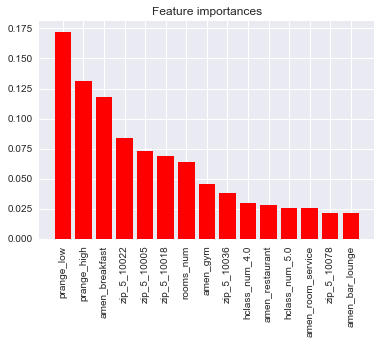

In [182]:
#feature importance plot
importances = rf_best.feature_importances_

feature_importances = zip(importances, X.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)
top_15_predictors = sorted_feature_importances[0:15]

values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print predictors

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

#### SVM

In [183]:
# gridsearch SVM
svc_params = {
    'C':np.logspace(1e-4, 1e1, 20),
    'kernel':['linear','rbf']
}

svc_gs = GridSearchCV(SVC(), svc_params, cv=5, verbose=1)
svc_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': array([  1.00023e+00,   3.36055e+00,   1.12907e+01,   3.79343e+01,
         1.27451e+02,   4.28206e+02,   1.43868e+03,   4.83363e+03,
         1.62399e+04,   5.45626e+04,   1.83318e+05,   6.15908e+05,
         2.06931e+06,   6.95243e+06,   2.33586e+07,   7.84798e+07,
         2.63675e+08,   8.85888e+08,   2.97639e+09,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [184]:
best_svc = svc_gs.best_estimator_
print svc_gs.best_params_
print svc_gs.best_score_

{'kernel': 'linear', 'C': 1.0002302850208247}
0.959641255605


In [185]:
print "Test set accuracy: ", svc_gs.score(X_test, Y_test)

Test set accuracy:  0.905829596413


In [186]:
svc_predictions = svc_gs.predict(X_test)

In [187]:
confusion_matrix(Y_test, svc_predictions)

array([[200,   6],
       [ 15,   2]])

In [188]:
conmat = np.array(confusion_matrix(Y_test, svc_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    2                   15
in_bottom_group                 6                  200


#### XGBoost Classifier

In [318]:
from xgboost import XGBClassifier

In [320]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid_xgb_cl = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

In [321]:
xgbc_gs = GridSearchCV(XGBClassifier(), param_grid_xgb_cl, cv=5, verbose=1)
xgbc_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   33.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'max_depth': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [322]:
best_xgbc = xgbc_gs.best_estimator_
print xgbc_gs.best_params_
print xgbc_gs.best_score_

{'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 6}
0.955156950673


In [323]:
print "Test set accuracy: ", xgbc_gs.score(X_test, Y_test)

Test set accuracy:  0.928251121076


In [324]:
xgbc_predictions = xgbc_gs.predict(X_test)

In [325]:
confusion_matrix(Y_test, xgbc_predictions)

array([[205,   1],
       [ 15,   2]])

In [326]:
conmat = np.array(confusion_matrix(Y_test, xgbc_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    2                   15
in_bottom_group                 1                  205


#### SGD Classifier

In [189]:
# search for best model with SGDClassifier
# logistic regression ridge or lasso penalties (not doing elastic net
# for the sake of my computer).
sgd_params = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5, 1, 100)
}

sgd_gs = GridSearchCV(SGDClassifier(), sgd_params, cv=5, verbose=1)
sgd_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [190]:
sgd_gs.best_score_

0.96860986547085204

In [191]:
sgd_predictions = sgd_gs.predict(X_test)

In [192]:
confusion_matrix(Y_test, sgd_predictions)

array([[198,   8],
       [ 16,   1]])

In [193]:
print "Test set accuracy: ", sgd_gs.score(X_test, Y_test)

Test set accuracy:  0.892376681614


In [194]:
conmat = np.array(confusion_matrix(Y_test, sgd_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    1                   16
in_bottom_group                 8                  198


#### KNN Classifier

In [195]:
knn_params = {
    'n_neighbors':range(1,51),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [196]:
knn_best = knn_gs.best_estimator_
print knn_gs.best_params_
print knn_gs.best_score_

{'n_neighbors': 5, 'weights': 'uniform'}
0.946188340807


In [197]:
print "Test set accuracy: ", knn_gs.score(X_test, Y_test)

Test set accuracy:  0.923766816143


In [198]:
knn_predictions = knn_gs.predict(X_test)

In [199]:
confusion_matrix(Y_test, knn_predictions)

array([[206,   0],
       [ 17,   0]])

In [200]:
conmat = np.array(confusion_matrix(Y_test, knn_predictions, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['in_top_group', 'in_bottom_group'],
                            columns=['predicted_in_top','predicted_in_bottom'])
print(confusion)

                 predicted_in_top  predicted_in_bottom
in_top_group                    0                   17
in_bottom_group                 0                  206


In [ ]:
xgb.DMatrix

In [249]:
import xgboost as xgb

In [260]:
#Identify target column
y_value = df2.rank_num

In [265]:
y_value.values.size

446

In [266]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb =  train_test_split(Xn_df, y_value, test_size = 0.5, random_state=1234)

In [251]:
xgb_rank = xgb.XGBModel(objective='rank:pairwise')

In [301]:
xgb_rank_regr = xgb.XGBRegressor(objective='rank:pairwise')

In [ ]:
# XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
#        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#        n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
#        silent=True, subsample=1)

In [299]:
n_estimators = [5, 10, 50, 100, 150]
max_depth = [2, 4, 6, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid_xgb = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

In [304]:
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
#, scoring="neg_log_loss"
xgb_gs = GridSearchCV(xgb_rank_regr, param_grid_xgb, cv=5, verbose=1)

xgb_gs.fit(X_train_xgb, Y_train_xgb)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   38.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 150], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'max_depth': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [305]:
xgb_regr_best = xgb_gs.best_estimator_
print xgb_gs.best_params_
print xgb_gs.best_score_

{'n_estimators': 150, 'learning_rate': 0.3, 'max_depth': 6}
-3.23109609196


In [311]:
print "Test set score: ", xgb_gs.score(X_test_xgb, Y_test_xgb)

Test set score:  -2.78169977152


In [307]:
xgb_regr_best.fit(X_train_xgb, Y_train_xgb)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=150, nthread=-1, objective='rank:pairwise', seed=0,
       silent=True, subsample=1)

In [310]:
xgb_regr_best.score(X_test_xgb, Y_test_xgb)

-2.7816997715167227

In [312]:
xgb_gs_preds = xgb_regr_best.predict(X_test_xgb)

In [313]:
xgb_gs_results_df = pd.DataFrame({'Predicted': xgb_gs_preds.tolist(), 'True': Y_test_xgb.tolist()})

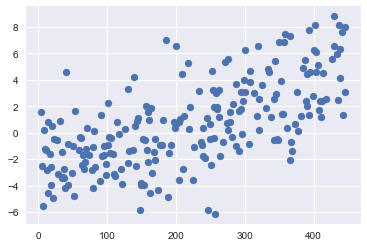

In [314]:
plt.scatter(xgb_gs_results_df.True, xgb_gs_results_df.Predicted);

In [315]:
xgb_gs_results_df.corr()

,Predicted,True
Predicted,1.000000,0.651122
True,0.651122,1.000000


In [252]:
xgb_rank.fit(X_train, Y_train)

XGBModel(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
     max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
     n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
     silent=True, subsample=1)

In [255]:
xgb_preds = xgb_rank.predict(X_test)

(array([  9.,  12.,  24.,  14.,  21.,   8.,   0.,  17.,   8.,   9.,   2.,
          4.,   0.,   3.,   4.,   5.,   4.,   2.,   2.,   1.,   2.,   0.,
          4.,   2.,   2.,   2.,   1.,   1.,   6.,   2.,   0.,   4.,   3.,
          3.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   3.,   2.,   1.,   3.,   0.,   5.,   1.,   1.,   1.,   1.,
          2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.84912539, -3.77888451, -3.70864363, -3.63840275, -3.56816187,
        -3.49792099, -3.42768011, -3.35743923, -3.28719835, -3.21695747,
        -3.14671659, -3.07647572, -3.00623484, -2.93599396, -2.86575308,
        -2.7955122 , -2.72527132, -2.65503044, -2.58478956, -2.51454868,
        -2.4443078 , -2.37

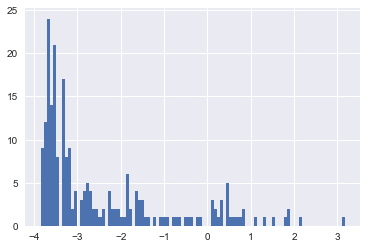

In [257]:
plt.hist(xgb_preds, bins=100)

In [252]:
xgb_rank.fit(X_train, Y_train)

XGBModel(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
     max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
     n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
     silent=True, subsample=1)

In [255]:
xgb_preds = xgb_rank.predict(X_test)

(array([  9.,  12.,  24.,  14.,  21.,   8.,   0.,  17.,   8.,   9.,   2.,
          4.,   0.,   3.,   4.,   5.,   4.,   2.,   2.,   1.,   2.,   0.,
          4.,   2.,   2.,   2.,   1.,   1.,   6.,   2.,   0.,   4.,   3.,
          3.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   3.,   2.,   1.,   3.,   0.,   5.,   1.,   1.,   1.,   1.,
          2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.84912539, -3.77888451, -3.70864363, -3.63840275, -3.56816187,
        -3.49792099, -3.42768011, -3.35743923, -3.28719835, -3.21695747,
        -3.14671659, -3.07647572, -3.00623484, -2.93599396, -2.86575308,
        -2.7955122 , -2.72527132, -2.65503044, -2.58478956, -2.51454868,
        -2.4443078 , -2.37

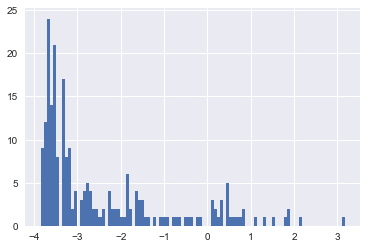

In [257]:
plt.hist(xgb_preds, bins=100)

In [275]:
xgb_rank_regr.fit(X_train_xgb, Y_train_xgb)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
       silent=True, subsample=1)

In [276]:
xgb_preds_regr = xgb_rank_regr.predict(X_test_xgb)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  2.,  2.,  3.,  6.,  3.,  4.,
         3.,  2.,  4.,  6.,  4.,  0.,  3.,  1.,  0.,  2.,  2.,  5.,  5.,
         2.,  2.,  6.,  4.,  3.,  6.,  5.,  4.,  7.,  8.,  0.,  2.,  4.,
         2.,  1.,  3.,  1.,  3.,  5.,  3.,  2.,  3.,  1.,  5.,  5.,  0.,
         3.,  3.,  0.,  4.,  3.,  3.,  2.,  0.,  1.,  3.,  1.,  2.,  1.,
         3.,  2.,  0.,  4.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  0.,  2.,
         1.,  4.,  3.,  0.,  1.,  3.,  2.,  3.,  1.,  0.,  0.,  2.,  1.,
         0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.9276135 , -1.87154961, -1.81548572, -1.75942183, -1.70335794,
        -1.64729406, -1.59123017, -1.53516628, -1.47910239, -1.4230385 ,
        -1.36697462, -1.31091073, -1.25484684, -1.19878295, -1.14271906,
        -1.08665518, -1.03059129, -0.9745274 , -0.91846351, -0.86239962,
        -0.80633574, -0.75027185, -0.69420796, -0.63814407, -0.58208018,
        -0.52601629, -0.46995241, -0.41388852, -0.35782463, -0.301760

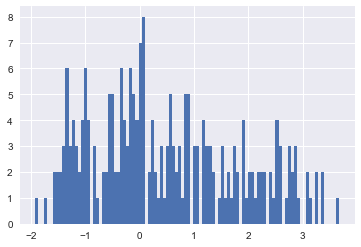

In [277]:
plt.hist(xgb_preds_regr, bins=100)

In [291]:
xgb_preds_regr.tolist()

[1.0044519901275635,
 0.30647221207618713,
 0.5547866225242615,
 0.7953309416770935,
 -1.0222893953323364,
 1.0796252489089966,
 -0.9716172218322754,
 -1.3219165802001953,
 3.2503387928009033,
 2.5410141944885254,
 2.011518955230713,
 3.3621039390563965,
 -0.32977211475372314,
 0.4109118580818176,
 0.047301292419433594,
 2.308042526245117,
 0.22937610745429993,
 1.8953899145126343,
 2.9343414306640625,
 1.2010622024536133,
 -0.565445065498352,
 0.5746579170227051,
 -1.0345178842544556,
 0.5201082229614258,
 -0.8386609554290771,
 -0.5037823915481567,
 0.520495593547821,
 2.0568912029266357,
 0.5952466726303101,
 1.9257968664169312,
 -0.6616928577423096,
 -1.0145577192306519,
 0.5488067865371704,
 -0.6293338537216187,
 2.1202025413513184,
 2.5307250022888184,
 1.2048707008361816,
 0.8649795055389404,
 -0.998563289642334,
 1.220019817352295,
 0.8337808847427368,
 -0.7638993263244629,
 0.08459076285362244,
 -0.11269700527191162,
 0.32707372307777405,
 1.6414389610290527,
 -1.22669947147369

In [286]:
xgb_preds_regr.reshape((223,1))

array([[ 1.00445199],
       [ 0.30647221],
       [ 0.55478662],
       [ 0.79533094],
       [-1.0222894 ],
       [ 1.07962525],
       [-0.97161722],
       [-1.32191658],
       [ 3.25033879],
       [ 2.54101419],
       [ 2.01151896],
       [ 3.36210394],
       [-0.32977211],
       [ 0.41091186],
       [ 0.04730129],
       [ 2.30804253],
       [ 0.22937611],
       [ 1.89538991],
       [ 2.93434143],
       [ 1.2010622 ],
       [-0.56544507],
       [ 0.57465792],
       [-1.03451788],
       [ 0.52010822],
       [-0.83866096],
       [-0.50378239],
       [ 0.52049559],
       [ 2.0568912 ],
       [ 0.59524667],
       [ 1.92579687],
       [-0.66169286],
       [-1.01455772],
       [ 0.54880679],
       [-0.62933385],
       [ 2.12020254],
       [ 2.530725  ],
       [ 1.2048707 ],
       [ 0.86497951],
       [-0.99856329],
       [ 1.22001982],
       [ 0.83378088],
       [-0.76389933],
       [ 0.08459076],
       [-0.11269701],
       [ 0.32707372],
       [ 1

In [292]:
xgb_results_df = pd.DataFrame({'Predicted': xgb_preds_regr.tolist(), 'True': Y_test_xgb.tolist()})

In [293]:
xgb_results_df.head()

,Predicted,True
0,1.004452,91.0
1,0.306472,239.0
2,0.554787,318.0
3,0.795331,367.0
4,-1.022289,65.0


In [295]:
xgb_results_df.to_csv('xgb_results.csv')

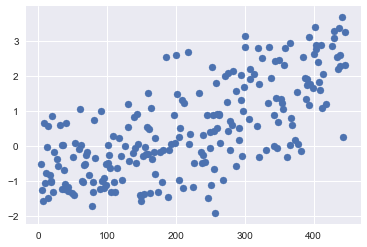

In [296]:
plt.scatter(xgb_results_df.True, xgb_results_df.Predicted);

In [316]:
xgb_results_df.corr()

,Predicted,True
Predicted,1.000000,0.699832
True,0.699832,1.000000


In [268]:
xgb_rank.fit(X_train_xgb, Y_train_xgb)

XGBModel(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
     max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
     n_estimators=100, nthread=-1, objective='rank:pairwise', seed=0,
     silent=True, subsample=1)

In [269]:
xgb_preds = xgb_rank.predict(X_test_xgb)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  2.,  2.,  3.,  6.,  3.,  4.,
         3.,  2.,  4.,  6.,  4.,  0.,  3.,  1.,  0.,  2.,  2.,  5.,  5.,
         2.,  2.,  6.,  4.,  3.,  6.,  5.,  4.,  7.,  8.,  0.,  2.,  4.,
         2.,  1.,  3.,  1.,  3.,  5.,  3.,  2.,  3.,  1.,  5.,  5.,  0.,
         3.,  3.,  0.,  4.,  3.,  3.,  2.,  0.,  1.,  3.,  1.,  2.,  1.,
         3.,  2.,  0.,  4.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  0.,  2.,
         1.,  4.,  3.,  0.,  1.,  3.,  2.,  3.,  1.,  0.,  0.,  2.,  1.,
         0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.9276135 , -1.87154961, -1.81548572, -1.75942183, -1.70335794,
        -1.64729406, -1.59123017, -1.53516628, -1.47910239, -1.4230385 ,
        -1.36697462, -1.31091073, -1.25484684, -1.19878295, -1.14271906,
        -1.08665518, -1.03059129, -0.9745274 , -0.91846351, -0.86239962,
        -0.80633574, -0.75027185, -0.69420796, -0.63814407, -0.58208018,
        -0.52601629, -0.46995241, -0.41388852, -0.35782463, -0.301760

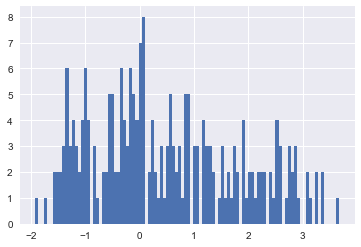

In [270]:
plt.hist(xgb_preds, bins=100)